In [14]:
%pip install --upgrade pip
%pip install scikit-fuzzy networkx


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [16]:
# Définition des variables floues pour l'analyse du confort thermique
temp = ctrl.Antecedent(np.arange(10, 51, 1), 'temp')
speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
comfort = ctrl.Consequent(np.arange(0, 11, 1), 'comfort')

# Fonctions d'appartenance pour la température
temp['bas'] = fuzz.trimf(temp.universe, [10, 10, 22])
temp['moyen'] = fuzz.trimf(temp.universe, [18, 26, 32])
temp['haut'] = fuzz.trimf(temp.universe, [30, 50, 50])

# Fonctions d'appartenance pour la vitesse du vent
speed['lent'] = fuzz.trimf(speed.universe, [0, 0, 45])
speed['modere'] = fuzz.trimf(speed.universe, [35, 52, 72])
speed['rapide'] = fuzz.trimf(speed.universe, [65, 100, 100])

# Fonctions d'appartenance pour le confort
comfort['mauvais'] = fuzz.trimf(comfort.universe, [0, 0, 4])
comfort['correct'] = fuzz.trimf(comfort.universe, [3, 5, 7])
comfort['bon'] = fuzz.trimf(comfort.universe, [6, 10, 10])


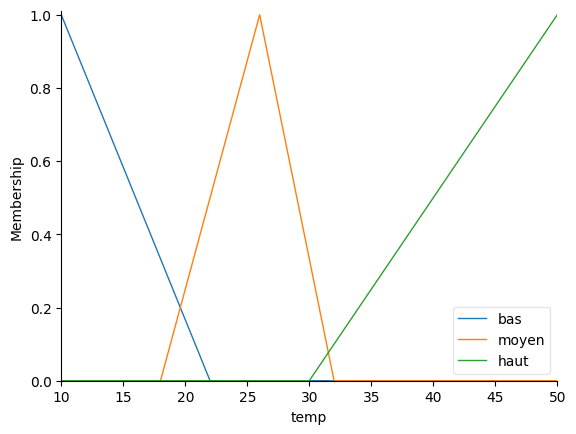

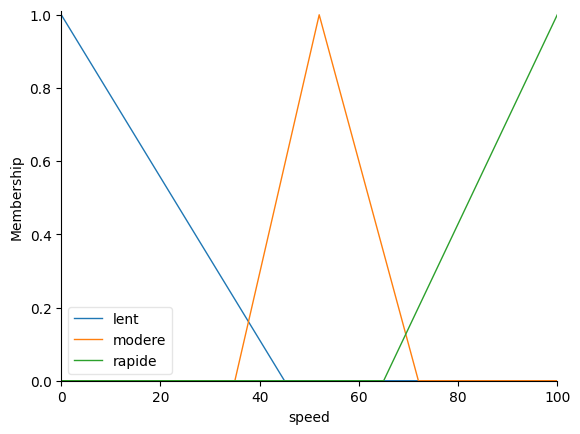

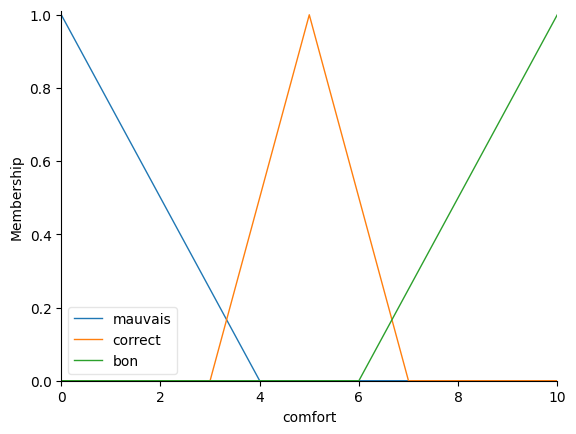

In [17]:
temp.view()
speed.view()
comfort.view()


In [18]:
# Règles floues (logique du confort thermique)
r1 = ctrl.Rule(temp['bas'] | speed['rapide'], comfort['mauvais'])
r2 = ctrl.Rule(temp['moyen'] & speed['modere'], comfort['correct'])
r3 = ctrl.Rule(temp['moyen'] & speed['lent'], comfort['bon'])
r4 = ctrl.Rule(temp['haut'] & speed['modere'], comfort['bon'])

controle_confort = ctrl.ControlSystem([r1, r2, r3, r4])
sim = ctrl.ControlSystemSimulation(controle_confort)


In [19]:
# Exemple de test
test_temp = 15
test_speed = 40

sim.input['temp'] = test_temp
sim.input['speed'] = test_speed

sim.compute()

print("Température d'essai: ", test_temp, "°C")
print("Vitesse du vent: ", test_speed, "km/h")
print("Résultat confort flou ≈ {:.2f}".format(sim.output['comfort']))


Température d'essai:  15 °C
Vitesse du vent:  40 km/h
Résultat confort flou ≈ 1.50
